In [1]:
import pandas as pd

In [2]:
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
covid_set = pd.read_csv("data/time_series_covid19_confirmed_global.csv")

In [3]:
covid_set.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/15/20', '10/16/20', '10/17/20', '10/18/20', '10/19/20', '10/20/20',
       '10/21/20', '10/22/20', '10/23/20', '10/24/20'],
      dtype='object', length=281)

In [4]:
covid_set = covid_set.drop(["Province/State", "Lat", "Long"], axis = "columns")

In [5]:
covid_set.head(5)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768
1,Albania,0,0,0,0,0,0,0,0,0,...,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858
2,Algeria,0,0,0,0,0,0,0,0,0,...,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880
3,Andorra,0,0,0,0,0,0,0,0,0,...,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038
4,Angola,0,0,0,0,0,0,0,0,0,...,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026


In [6]:
datestamp = covid_set.columns
count = {}

for date in datestamp[1:]: # ignore first column
    MDY = date.split("/") # MDY = month date year
    if MDY[0] in count.keys():
        count[MDY[0]] = count[MDY[0]]+1
    else:
        count[MDY[0]] = 1

print(count)

{'1': 10, '2': 29, '3': 31, '4': 30, '5': 31, '6': 30, '7': 31, '8': 31, '9': 30, '10': 24}


In [7]:
country_filt = covid_set["Country/Region"] == "Bangladesh"
bd = covid_set[country_filt]

In [8]:
bd

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
20,Bangladesh,0,0,0,0,0,0,0,0,0,...,384559,386086,387295,388569,390206,391586,393131,394827,396413,397507


In [9]:
temp_bd = bd.drop("Country/Region", axis = "columns")

In [10]:
month = []
for key, value in count.items():
    month.append(key)
# datestamp

start = 0
finish = 0 # dummy value

month_name = ["January","February","March","April","May","June","July","August","September","October","November","December"]

monthy_case = {}

for i in range(0,len(month)):
    finish = finish + count[month[i]]
    sum_series = temp_bd.iloc[:,start:finish].sum(axis = "columns")
    start = finish
    
    for index,value in sum_series.items():
        monthy_case[month_name[i]] = value # parse value from series [format before: index value]

In [11]:
monthy_case

{'January': 0,
 'February': 0,
 'March': 546,
 'April': 70283,
 'May': 731311,
 'June': 2836656,
 'July': 6049862,
 'August': 8565945,
 'September': 10232791,
 'October': 9142491}

In [28]:
from matplotlib import pyplot as plt

index = []
value = []

for key in monthy_case.keys():
    index.append(key)
    value.append(monthy_case[key])

Cases from '1/22/20' to '10/24/20'


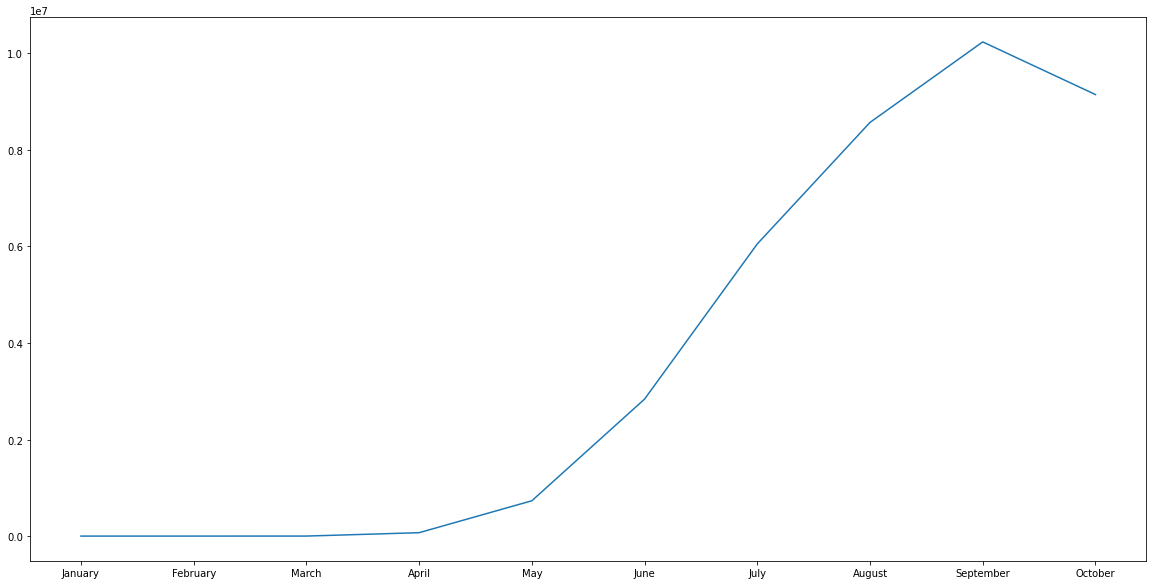

In [49]:
plt.figure(figsize=(20,10))
plt.plot(index,value)
print("Cases from '1/22/20' to '10/24/20'")

### These do not represent the actual number of cases.